# Linear Discriminant Analysis - Demonstration
## Without dimensionality reduction

In [22]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from LinearDiscriminantAnalysis import LinearDiscriminantAnalysis

# Configuration:
np.set_printoptions(precision=4, suppress=True)
warnings.filterwarnings("ignore", category=UserWarning)

# Dataset:
mnist = fetch_openml('mnist_784', version=1, data_home='.', as_frame=True)
mnist.frame['target'] = mnist.target

# Function for displaying part of the dataset:
def print_mnist(X, y=None, title=None):
    fig = plt.figure(figsize=(6, 6))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(min(X.shape[0], 64)):
        ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
        ax.imshow(X.reshape(-1, 28, 28)[i], cmap=plt.cm.binary, interpolation='nearest')
        if y is not None:
            ax.text(0, 7, str(y[i]))
    
    fig.suptitle(title, y=1.08, fontsize=22)

In [2]:
X = mnist.data.to_numpy()
y = mnist.target.to_numpy()

X.shape, y.shape

((70000, 784), (70000,))

## PCA Transformation
This is the pairplot of the first 8 dimensions of the MNIST dataset from Sci-Kit Learn after applying PCA.

In [3]:
pca = PCA(random_state=42)
X_pca = pca.fit_transform(X)

X_pca.shape

(70000, 784)

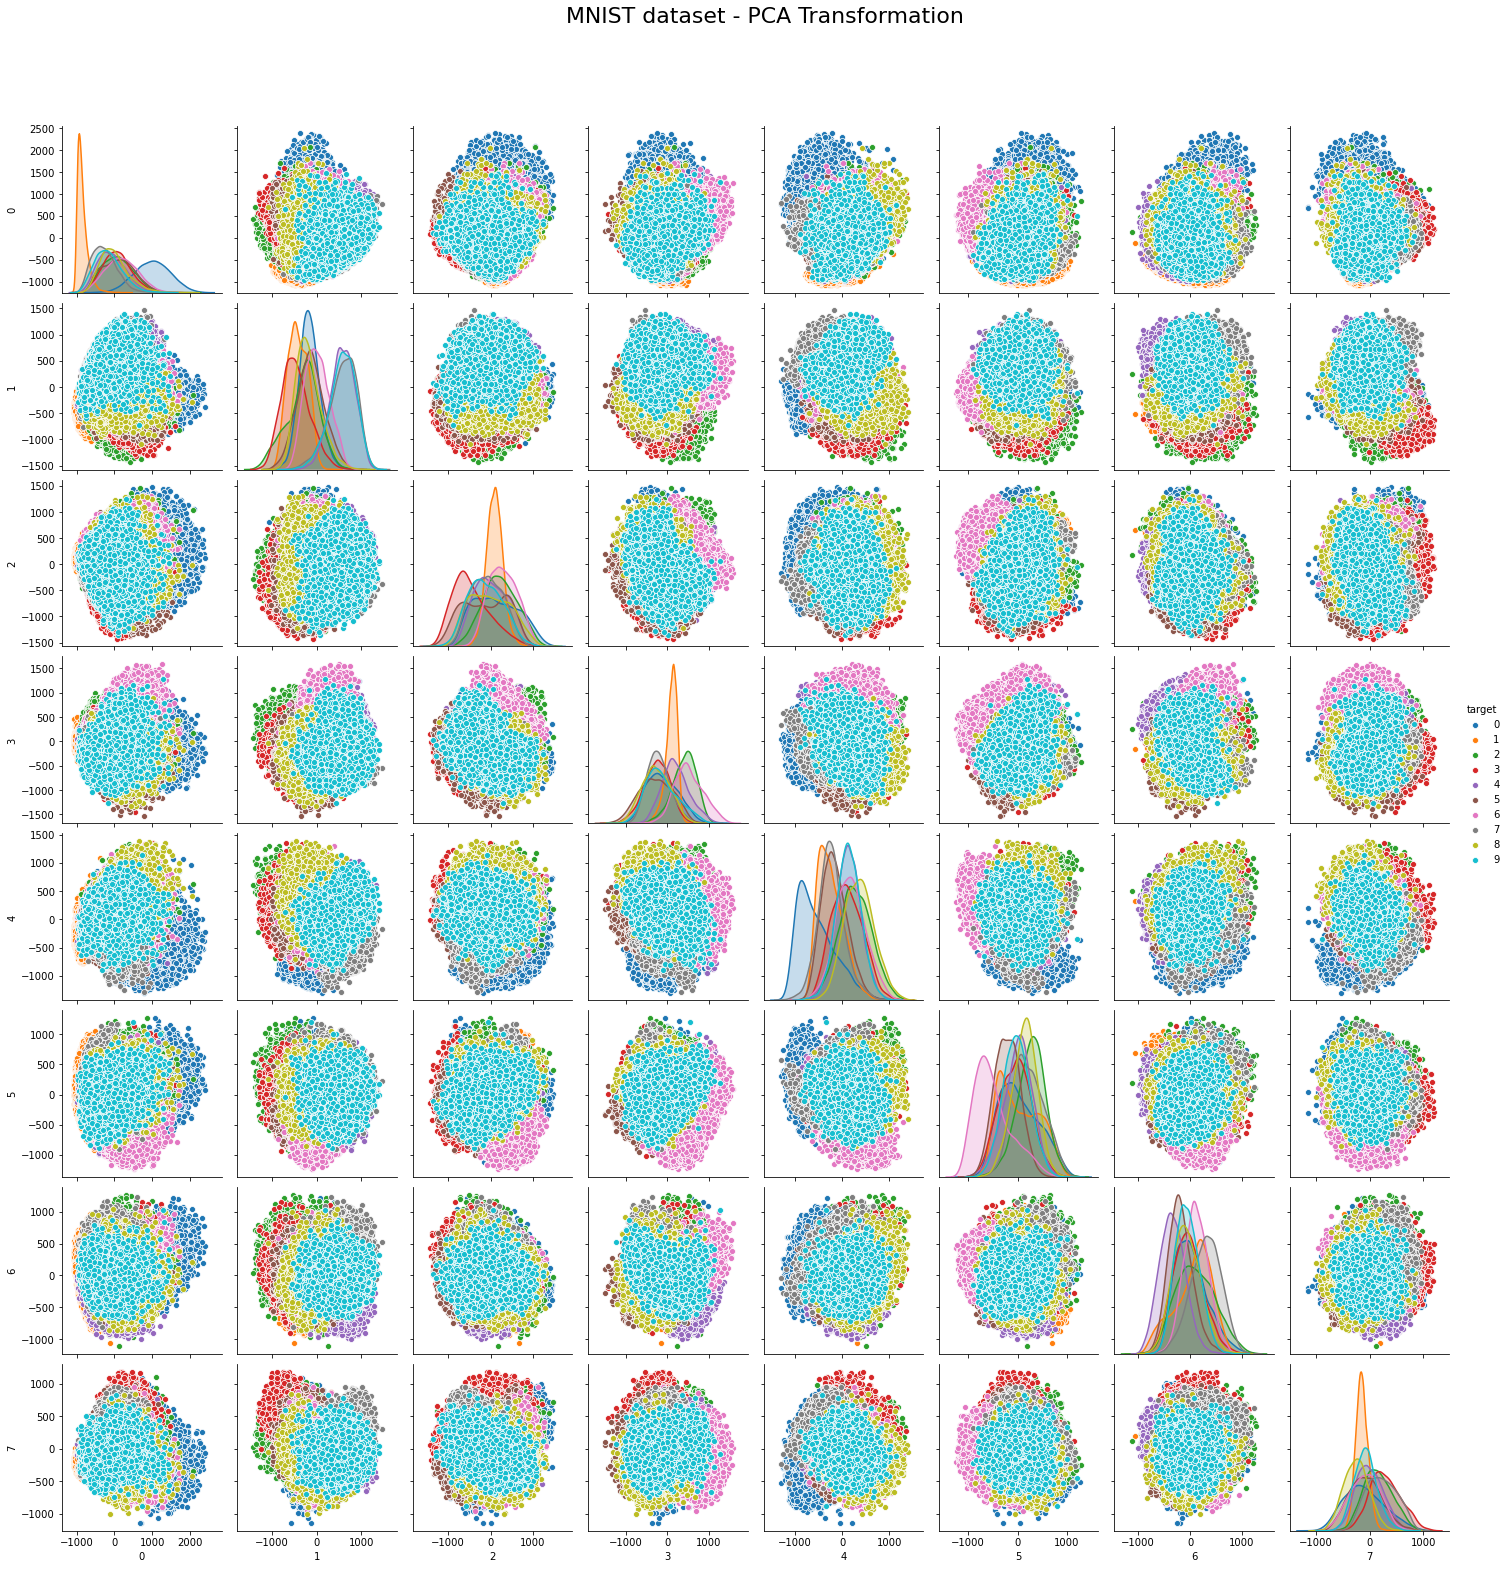

In [4]:
mnist_pca = pd.DataFrame.from_records(X_pca[:, :8])
mnist_pca['target'] = y
g = sns.pairplot(mnist_pca, hue="target")
g.fig.suptitle(f"MNIST dataset - PCA Transformation", y=1.08, fontsize=22);

In [5]:
X_pca_inv = pca.inverse_transform(X_pca)

X_pca_inv.shape

(70000, 784)

## LDA Transformation
This is the pairplot of the first 8 dimensions of the MNIST dataset from Sci-Kit Learn after applying LDA.

In [6]:
lda = LinearDiscriminantAnalysis(random_state=42)
X_lda = lda.fit_transform(X, y, verbose=True)

X_lda.shape

Targets were provided: using the labeled data.

Mu:
[[  0.       0.       0.       0.       0.       0.       0.       0.
    0.       0.       0.       0.       0.0018   0.0067   0.0031   0.0001
    0.       0.       0.       0.       0.       0.       0.       0.
    0.       0.       0.       0.       0.       0.       0.       0.
    0.0002   0.0013   0.0113   0.0231   0.0432   0.0622   0.1179   0.1712
    0.1934   0.1901   0.2063   0.1827   0.1701   0.1445   0.0992   0.0682
    0.0489   0.0183   0.0086   0.003    0.       0.       0.       0.
    0.       0.       0.0009   0.0006   0.006    0.0109   0.0563   0.1394
    0.2682   0.521    0.9166   1.4125   2.0055   2.6448   3.2949   3.6582
    3.6887   3.3026   2.7046   1.9718   1.1747   0.608    0.2864   0.0918
    0.0303   0.0074   0.       0.       0.       0.       0.0028   0.005
    0.0132   0.0703   0.2188   0.5492   1.1733   2.2705   3.782    5.6468
    7.6889   9.9488  11.987   13.2303  12.9729  11.5404   9.3011   6.6749
   

Mu_c[3]:
[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.0066   0.0284   0.0648   0.0564   0.0608   0.0641   0.0573
   0.0644   0.0622   0.0343   0.0106   0.0013   0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.0035   0.137    0.205    0.3515   0.7738   1.5197   2.5453   4.0871
   5.4824   6.0921   6.2844   5.8286   4.9999   4.058    2.7912   1.7082
   0.9852   0.3773   0.1108   0.0133   0.0067   0.       0.       0.
   0.       0

Mu_c[7]:
[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.  

S_intra:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

S_inter:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Singular values:
Singular value 1: 	23.72%   	3.83105  	 Accepted
Singular value 2: 	20.35%   	3.28645  	 Accepted
Singular value 3: 	17.73%   	2.86456  	 Accepted
Singular value 4: 	10.70%   	1.72874  	 Accepted
Singular value 5: 	9.44%    	1.52483  	 Accepted
Singular value 6: 	6.91%    	1.11566  	 Accepted
Singular value 7: 	5.01%    	0.809705 	 Accepted
Singular value 8: 	3.45%    	0.556763 	 Accepted
Singular value 9: 	2.69%    	0.434546 	 Accepted
Singular value 10: 	0.00%    	1.01996e-14 	 Rejected
Singular value 11: 	0.00%    	1.01996e-14 	 Rejected
Singular value 12: 	0.00%    	8.82308e-15 	 Rejected
Singular value 13: 	0.00%    	8.41812e-15 	 Rejecte

W:
[[ 0.      0.      0.     ...  0.0269 -0.0107  0.0234]
 [ 0.      0.      0.     ...  0.0915  0.0133 -0.0502]
 [ 0.      0.      0.     ...  0.0039  0.0627 -0.0297]
 ...
 [ 0.      0.      0.     ...  0.0295 -0.0307 -0.0143]
 [ 0.      0.      0.     ... -0.0107  0.0112  0.0008]
 [ 0.      0.      0.     ... -0.0066  0.0046  0.0198]]



(70000, 784)

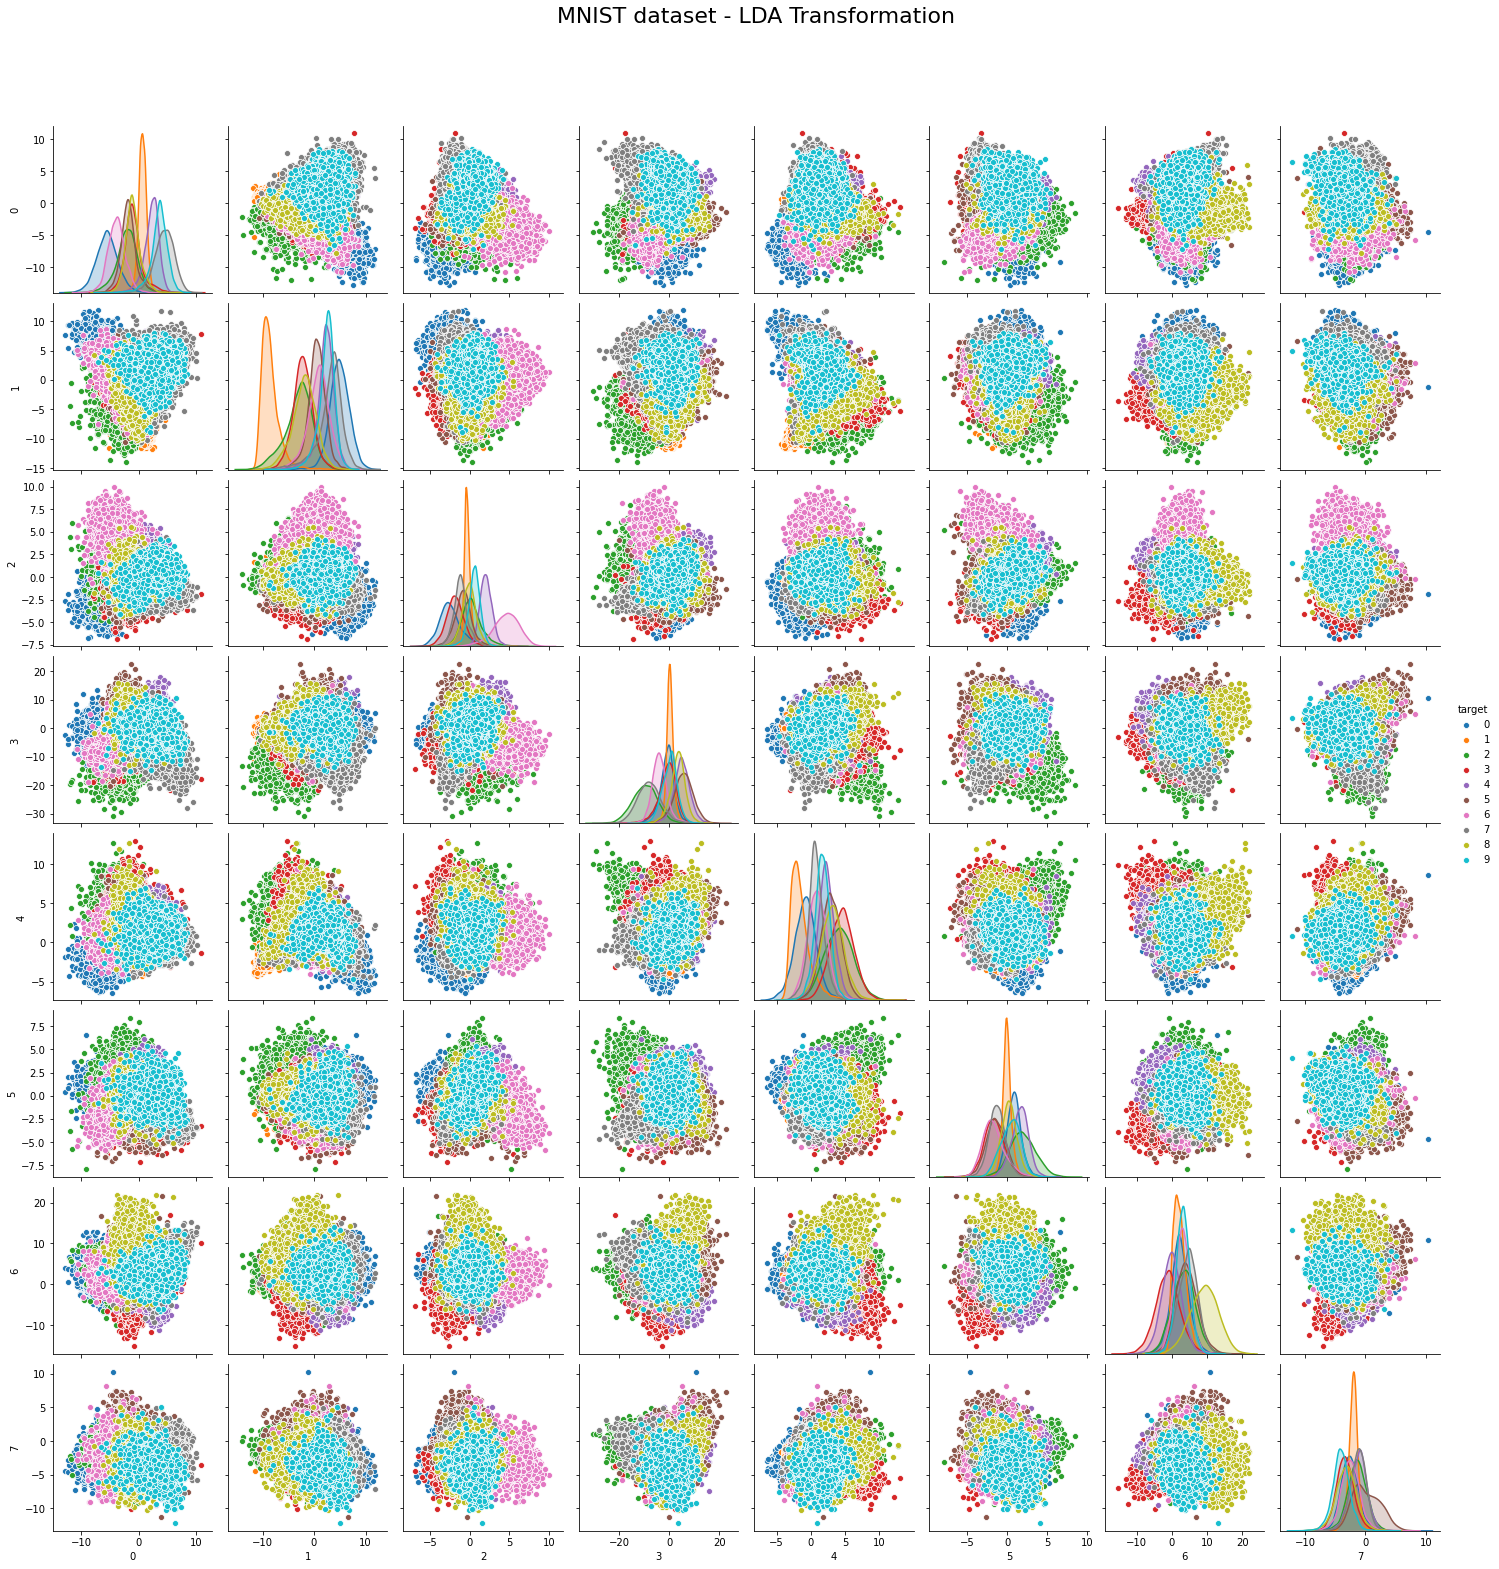

In [7]:
mnist_lda = pd.DataFrame.from_records(X_lda[:, :8])
mnist_lda['target'] = y
g = sns.pairplot(mnist_lda, hue="target")
g.fig.suptitle(f"MNIST dataset - LDA Transformation", y=1.08, fontsize=22);

In [8]:
X_lda_inv = lda.inverse_transform(X_lda, verbose=True)

X_lda_inv.shape

(70000, 784)

## Unsupervised LDA Transformation
This is the pairplot of the first 8 dimensions of the MNIST dataset from Sci-Kit Learn after applying Unsupervised LDA.

In [9]:
ulda = LinearDiscriminantAnalysis(random_state=42, covariance_type='spherical')
X_ulda = ulda.fit_transform(X, min_clusters=130, max_clusters=140, verbose=True)

X_ulda.shape

No target is provided: using unsupervised clustering.

Searching for an optimal number of clusters between 130 and 140...

130 clusters: 	AIC: 575344992.6695912, 	BIC: 576280569.1915797  
131 clusters: 	AIC: 575358513.3649877, 	BIC: 576301286.6998857  
132 clusters: 	AIC: 575172700.256843, 	BIC: 576122670.4046506  
133 clusters: 	AIC: 575123032.0673373, 	BIC: 576080199.0280544  
134 clusters: 	AIC: 575023901.2992254, 	BIC: 575988265.072852  
135 clusters: 	AIC: 574994450.1682886, 	BIC: 575966010.7548248  
136 clusters: 	AIC: 574877072.5834174, 	BIC: 575855829.9828631  
137 clusters: 	AIC: 574831145.3912379, 	BIC: 575817099.603593  
138 clusters: 	AIC: 574775286.1946379, 	BIC: 575768437.2199026  
139 clusters: 	AIC: 574724497.878309, 	BIC: 575724845.7164832  
140 clusters: 	AIC: 574677907.0676944, 	BIC: 575685451.7187783  
Optimal number of clusters found: 140

Predicting the classes from the clusters...

Mu:
[[  0.       0.       0.       0.       0.       0.       0.       0.
    0.  

Mu_c[21]:
[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.0904   0.4558   0.5808   0.6577   0.2346   0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0. 

Mu_c[44]:
[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.3025   0.335    0.815    2.0625   3.99     4.8975
   3.765    2.345    1.515    0.7325   0.2      0.       0.       0.
   0.       0.      

Mu_c[67]:
[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.2217   0.2115   0.0152   0.0102   0.5381   1.2555
   1.2301   1.2047   0.819    0.8477   0.3435   0.       0.       0.3486
   0.1574   0.       0.       0.       0.       0.       0.0186   0.
   0.       0.       0.       0.       0.2403   0.5025   1.2606   1.9137
   4.9611  10.6379  19.4704  33.2352  48.4112  53.5533  44.4805  30.8545
  13.4907   2.154    0.1997   0.3909   0.0575   0.       0.       0.
   0.   

Mu_c[91]:
[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.7732   1.9586   2.5996
   1.3945   0.2465   0.       0.       0.       0.       0.       0.
   0.       0.      

Mu_c[115]:
[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.

Mu_c[138]:
[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.0624   0.3174   0.1688   0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.

S_intra:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

S_inter:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Singular values:
Singular value 1: 	10.74%   	7.75853  	 Accepted
Singular value 2: 	8.96%    	6.46935  	 Accepted
Singular value 3: 	6.52%    	4.71099  	 Accepted
Singular value 4: 	6.23%    	4.49868  	 Accepted
Singular value 5: 	4.99%    	3.6039   	 Accepted
Singular value 6: 	4.64%    	3.34933  	 Accepted
Singular value 7: 	4.12%    	2.97779  	 Accepted
Singular value 8: 	3.41%    	2.46343  	 Accepted
Singular value 9: 	3.07%    	2.21572  	 Accepted
Singular value 10: 	2.65%    	1.91391  	 Accepted
Singular value 11: 	2.21%    	1.59483  	 Accepted
Singular value 12: 	2.10%    	1.51948  	 Accepted
Singular value 13: 	2.05%    	1.47935  	 Accepted
Singular v

W:
[[ 0.      0.      0.     ...  0.0269 -0.0107  0.0234]
 [ 0.      0.      0.     ...  0.0915  0.0133 -0.0502]
 [ 0.      0.      0.     ...  0.0039  0.0627 -0.0297]
 ...
 [ 0.      0.      0.     ...  0.0295 -0.0307 -0.0143]
 [ 0.      0.      0.     ... -0.0107  0.0112  0.0008]
 [ 0.      0.      0.     ... -0.0066  0.0046  0.0198]]



(70000, 784)

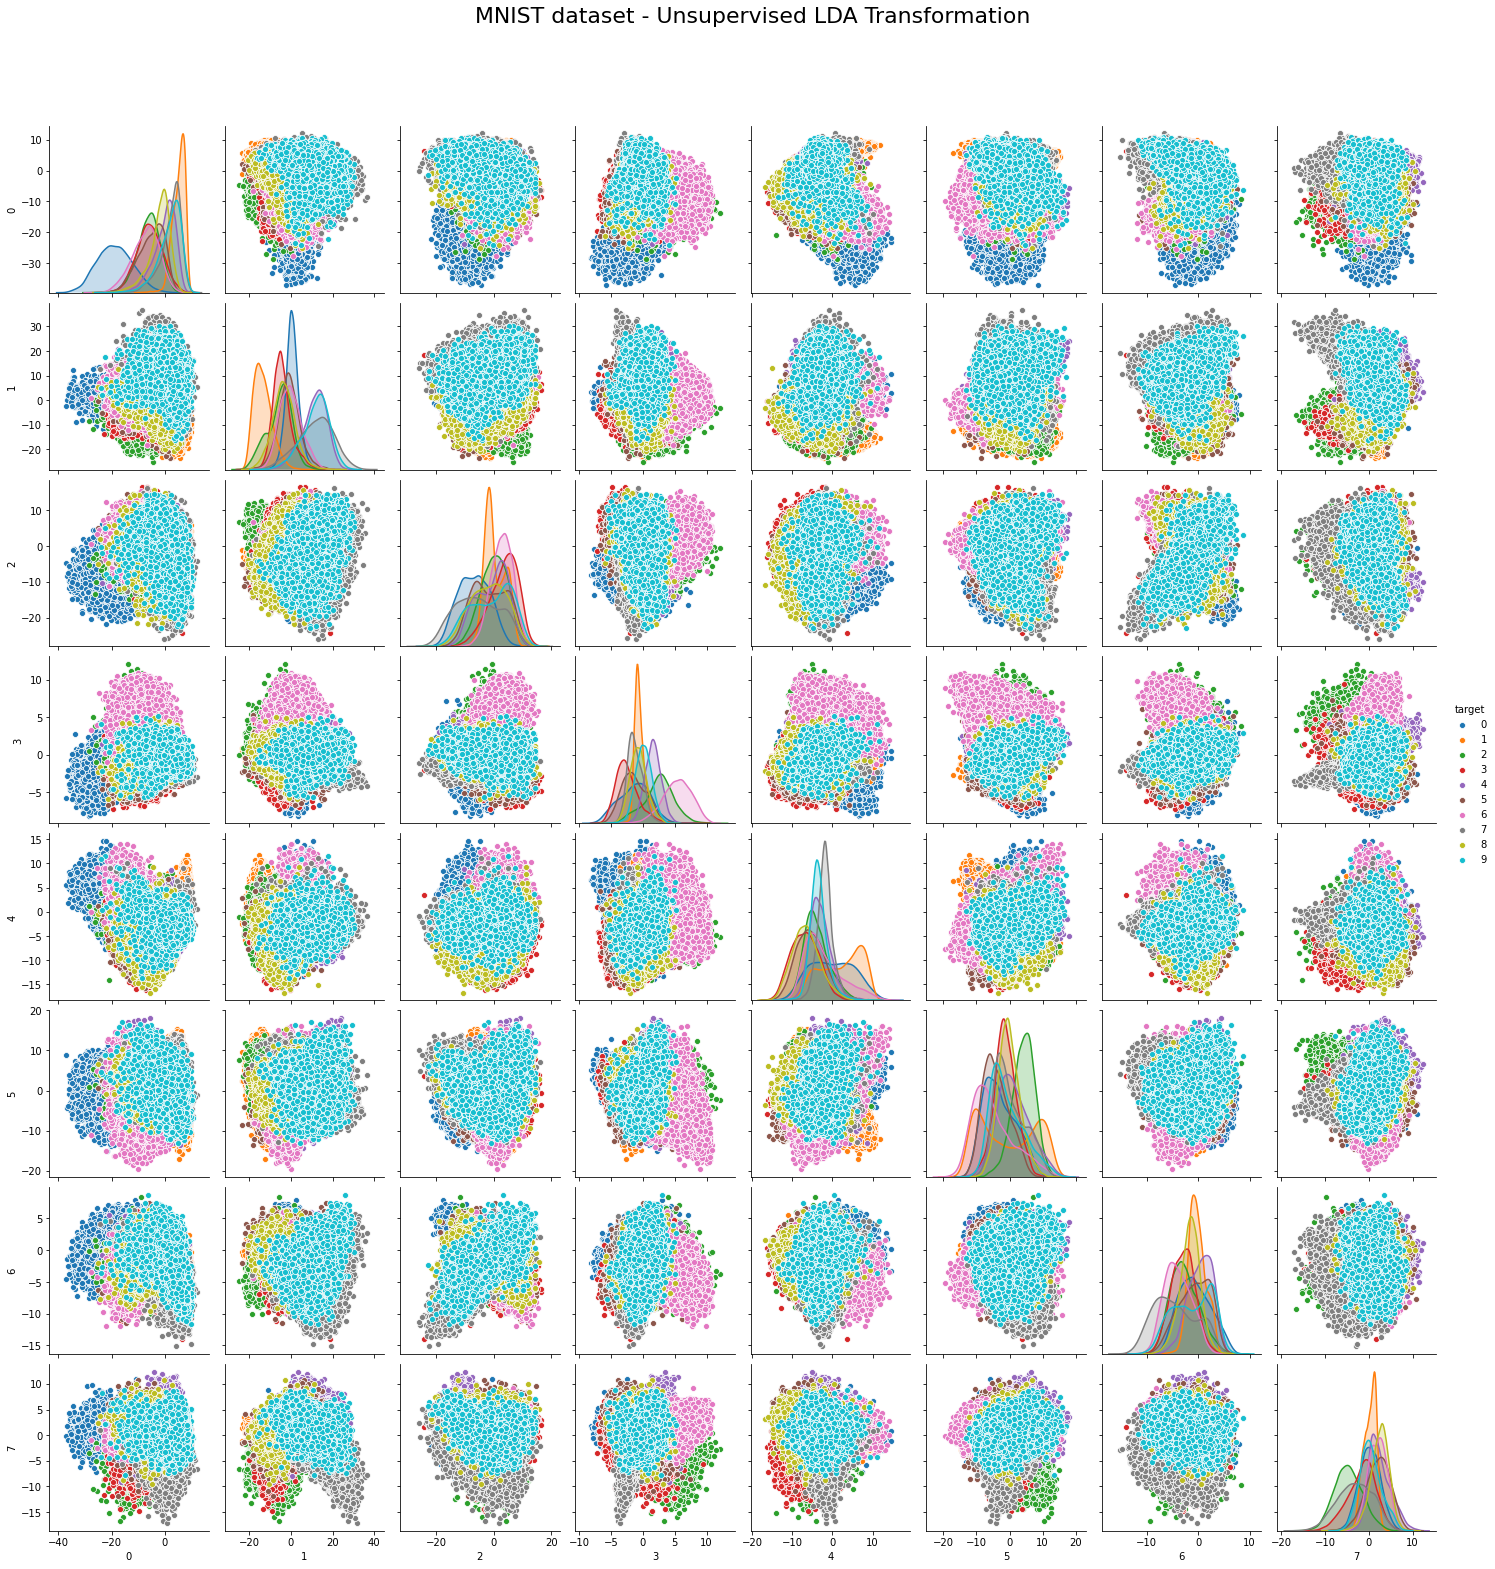

In [10]:
mnist_ulda = pd.DataFrame.from_records(X_ulda[:, :8])
mnist_ulda['target'] = y
g = sns.pairplot(mnist_ulda, hue="target")
g.fig.suptitle(f"MNIST dataset - Unsupervised LDA Transformation", y=1.08, fontsize=22);

In [11]:
X_ulda_inv = ulda.inverse_transform(X_ulda, verbose=True)

X_ulda_inv.shape

(70000, 784)

## Comparison

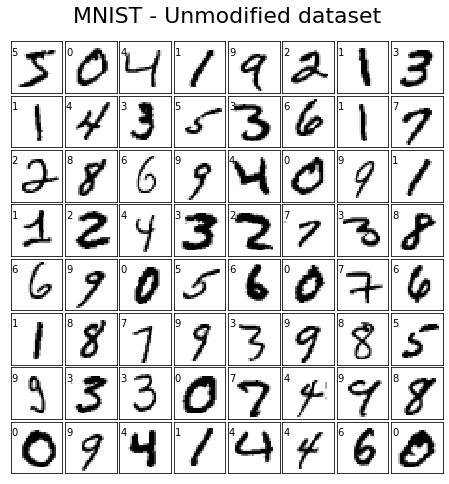

In [12]:
print_mnist(X, y, title="MNIST - Unmodified dataset")

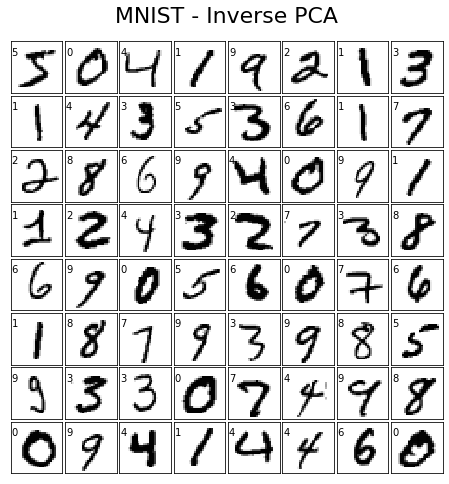

In [13]:
print_mnist(X_pca_inv, y, title="MNIST - Inverse PCA")

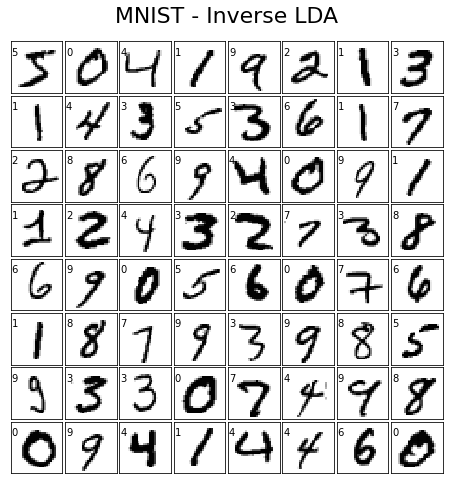

In [14]:
print_mnist(X_lda_inv, y, title="MNIST - Inverse LDA")

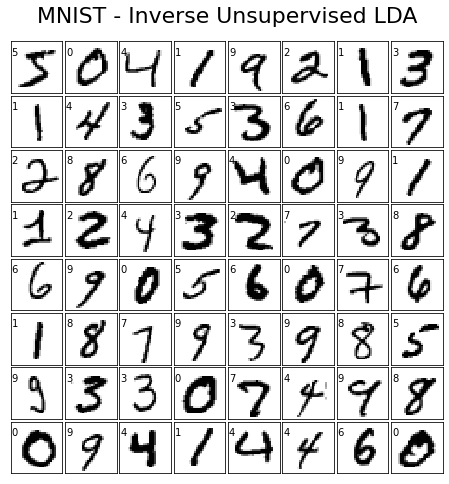

In [15]:
print_mnist(X_ulda_inv, y, title="MNIST - Inverse Unsupervised LDA")

In [16]:
gnb = GaussianNB()
res_original = np.mean(cross_val_score(gnb, X, y, cv=5, scoring='accuracy'))
res_pca = np.mean(cross_val_score(gnb, X_pca, y, cv=5, scoring='accuracy'))
res_lda = np.mean(cross_val_score(gnb, X_lda, y, cv=5, scoring='accuracy'))
res_ulda = np.mean(cross_val_score(gnb, X_ulda, y, cv=5, scoring='accuracy'))
print(f"Prediction score with Naive Bayes:\n"
      f" - Original dataset                   : {res_original:.2%}\n"
      f" - PCA transformation                 : {res_pca:.2%}\n"
      f" - LDA transformation                 : {res_lda:.2%}\n"
      f" - Unsupervised LDA transformation    : {res_ulda:.2%}\n")

Prediction score with Naive Bayes:
 - Original dataset                   : 55.66%
 - PCA transformation                 : 40.97%
 - LDA transformation                 : 86.28%
 - Unsupervised LDA transformation    : 86.28%



In [17]:
dtc = DecisionTreeClassifier(max_depth=9, random_state=42)
res_original = np.mean(cross_val_score(dtc, X, y, cv=5, scoring='accuracy'))
res_pca = np.mean(cross_val_score(dtc, X_pca, y, cv=5, scoring='accuracy'))
res_lda = np.mean(cross_val_score(dtc, X_lda, y, cv=5, scoring='accuracy'))
res_ulda = np.mean(cross_val_score(dtc, X_ulda, y, cv=5, scoring='accuracy'))
print(f"Prediction score with a Decision Tree Classifier:\n"
      f" - Original dataset                   : {res_original:.2%}\n"
      f" - PCA transformation                 : {res_pca:.2%}\n"
      f" - LDA transformation                 : {res_lda:.2%}\n"
      f" - Unsupervised LDA transformation    : {res_ulda:.2%}\n")

Prediction score with a Decision Tree Classifier:
 - Original dataset                   : 83.74%
 - PCA transformation                 : 76.18%
 - LDA transformation                 : 84.38%
 - Unsupervised LDA transformation    : 79.79%



In [18]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation='tanh', max_iter=250, alpha=0.01, solver='sgd', 
                    verbose=False, random_state=42, learning_rate_init=.01, early_stopping=True)
res_original = np.mean(cross_val_score(mlp, X, y, cv=5, scoring='accuracy'))
res_pca = np.mean(cross_val_score(mlp, X_pca, y, cv=5, scoring='accuracy'))
res_lda = np.mean(cross_val_score(mlp, X_lda, y, cv=5, scoring='accuracy'))
res_ulda = np.mean(cross_val_score(mlp, X_ulda, y, cv=5, scoring='accuracy'))
print(f"Prediction score with a Multilayer Perceptron Classifier:\n"
      f" - Original dataset                   : {res_original:.2%}\n"
      f" - PCA transformation                 : {res_pca:.2%}\n"
      f" - LDA transformation                 : {res_lda:.2%}\n"
      f" - Unsupervised LDA transformation    : {res_ulda:.2%}\n")

Prediction score with a Multilayer Perceptron Classifier:
 - Original dataset                   : 83.97%
 - PCA transformation                 : 94.00%
 - LDA transformation                 : 83.07%
 - Unsupervised LDA transformation    : 83.17%



## Visualization of the centroids

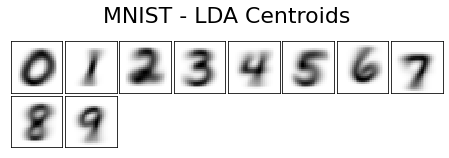

In [23]:
print_mnist(lda.mu_c_.T, title="MNIST - LDA Centroids")

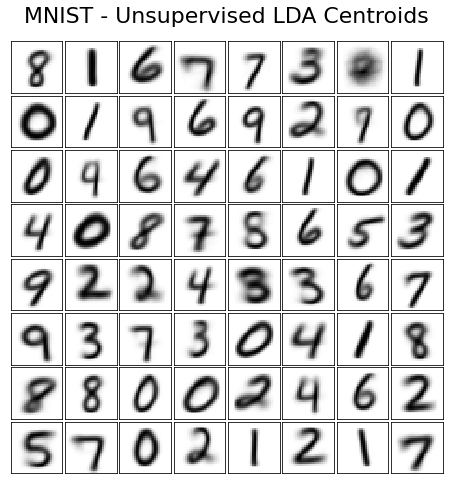

In [24]:
print_mnist(ulda.mu_c_.T, title="MNIST - Unsupervised LDA Centroids")